Connecting and mapping the directory for working with EDA (Exploratory Data Analysis)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setting the path and importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define data path
project_path = "/content/drive/MyDrive/gini_income_tax_analysis"
data_path = f"{project_path}/data"

In [4]:
import os

output_path = f"{project_path}/outputs"
os.makedirs(output_path, exist_ok=True)

Loading the merged dataset

In [3]:
# Load merged data
merged_df = pd.read_csv(f"{data_path}/merged_data.csv")
merged_df.head()

,Country,Year,Gini_Pre_Tax,Gini_Post_Tax,Tax_Rate
0,Germany,2000,0.487,0.340,45.60
1,Germany,2001,0.523,0.393,44.53
2,Germany,2002,0.466,0.358,43.36
3,Germany,2003,0.456,0.312,43.40
4,Germany,2004,0.510,0.375,44.90


Line Plots — Gini and Tax Rates Over Time

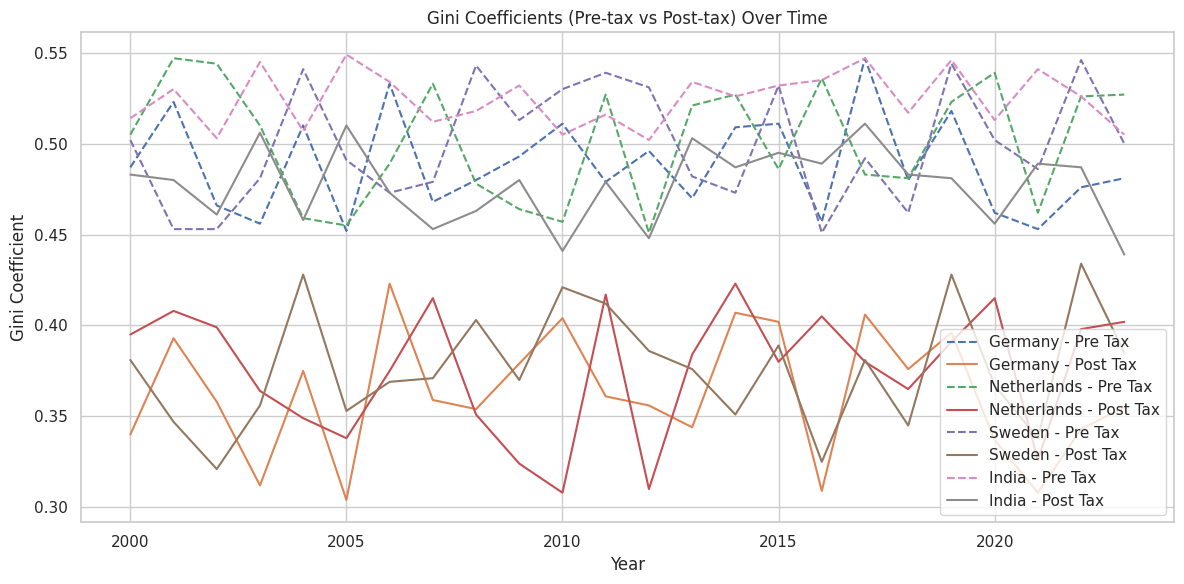

In [5]:
plt.figure(figsize=(12, 6))
for country in merged_df['Country'].unique():
    subset = merged_df[merged_df['Country'] == country]
    plt.plot(subset['Year'], subset['Gini_Pre_Tax'], label=f"{country} - Pre Tax", linestyle='--')
    plt.plot(subset['Year'], subset['Gini_Post_Tax'], label=f"{country} - Post Tax")

plt.title("Gini Coefficients (Pre-tax vs Post-tax) Over Time")
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_path}/gini_trend_plot.png", dpi=300)
plt.show()

Tax Rate Trend Over Time

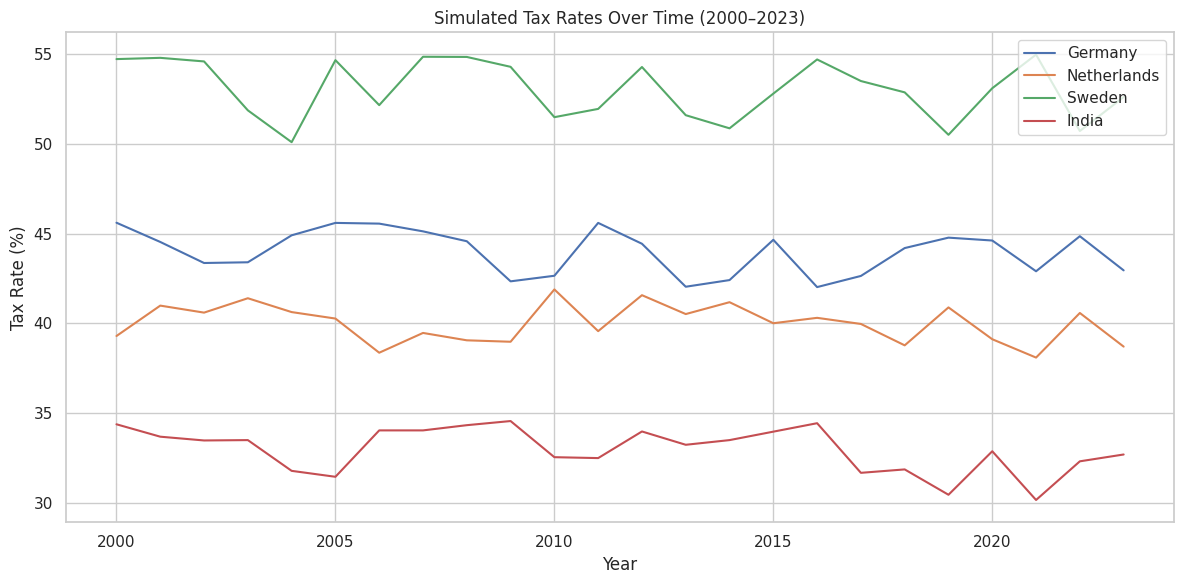

In [6]:
plt.figure(figsize=(12, 6))
for country in merged_df['Country'].unique():
    subset = merged_df[merged_df['Country'] == country]
    plt.plot(subset['Year'], subset['Tax_Rate'], label=country)

plt.title("Simulated Tax Rates Over Time (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Tax Rate (%)")
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_path}/tax_rate_plot.png", dpi=300)
plt.show()

Scatter Plot — Tax Rate vs Gini Post-Tax

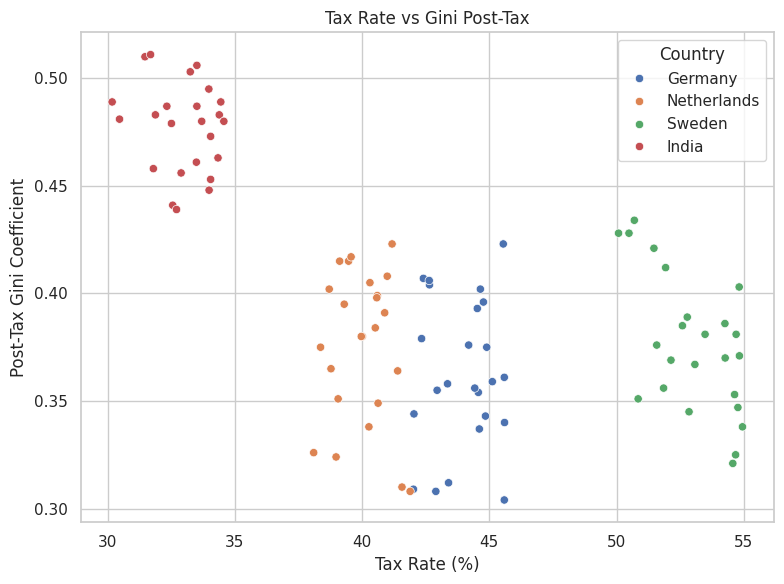

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="Tax_Rate", y="Gini_Post_Tax", hue="Country")
plt.title("Tax Rate vs Gini Post-Tax")
plt.xlabel("Tax Rate (%)")
plt.ylabel("Post-Tax Gini Coefficient")
plt.tight_layout()
plt.savefig(f"{output_path}/tax_vs_gini_scatter.png", dpi=300)
plt.show()

Correlation Matrix

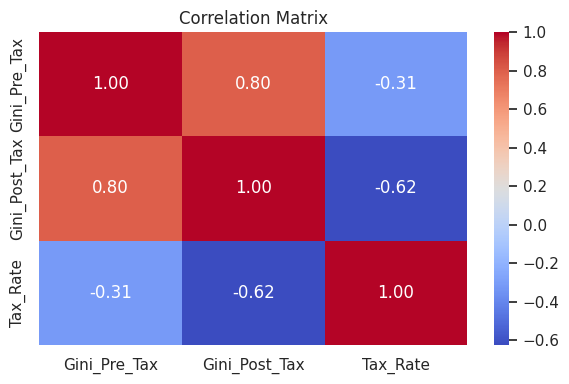

In [8]:
corr = merged_df[['Gini_Pre_Tax', 'Gini_Post_Tax', 'Tax_Rate']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(f"{output_path}/correlation_matrix.png", dpi=300)
plt.show()